# Несбалансированные выборки. Практическая работа

## Цель практической работы

Научиться обрабатывать несбалансированные данные и обучать модели машинного обучения на таких данных.

## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Разделить данные на обучающую и тестовую выборки.
3. Подготовить данные для моделирования.
4. Сбалансировать данные методом SMOTE и обучить модель машинного обучения.
5. Обучить модель машинного обучения с использованием весов классов и кросс-валидации.
6. Сравнить метрики качества четырёх моделей.




## Что оценивается 

- Выполнены все этапы работы.
- Не допущена утечка данных при разделении выборок и подготовке данных.
- Данные корректным образом сбалансированы.
- Модели не переобучены.


## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint из вкладки меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.


# Задача

Пусть у нас имеется некоторый набор данных `german_credit_data.csv` о заёмщиках банка:

* Age — возраст заёмщика.
* Sex — пол заёмщика.
* Job — тип работы заёмщика.
* Housing — тип жилья заёмщика.
* Saving accounts — объём средств на сберегательных счетах заёмщика.
* Checking account — объём средств на основном счёте заёмщика.
* Credit amount — размер кредита. 
* Duration — срок кредита (в месяцах).
* Purpose — цель кредита.
* Risk — таргет, допустил ли заёмщик просрочку платежей по кредиту.

Решите задачу классификации заёмщиков, чтобы банк умел заранее предсказывать просрочку платежей по кредиту. 



# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("german_credit_data.csv")
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [4]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


видно, что в наборе данных есть 183 недостающих данных в столбце сберегательных счетов и 394 недостающих данных в столбце текущего счета. Сюда не входят сберегательные счета (1,83%) и текущие счета (3,94%).

In [5]:
from matplotlib import pyplot as plt

(array([149., 262., 177., 155.,  89.,  72.,  42.,  26.,  21.,   7.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <BarContainer object of 10 artists>)

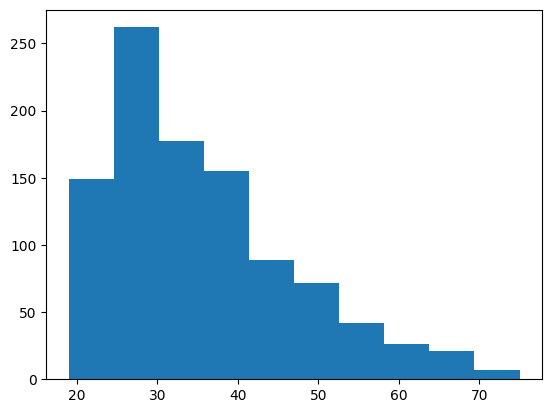

In [6]:
plt.hist(df.Age)

как видно из гистограммы набора данных, количество заемщиков в возрасте 20-25 лет составляет 150 человек. График 25-30 резко растет, поскольку количество кредитов увеличилось на 166,6%. 30-35-летние немного больше, чем 20-25-летние, но значительно меньше, чем 25-30-летние. Число заемщиков в возрасте 35-40 лет практически равно числу заемщиков в возрасте 20-25 лет, но значительно меньше, чем заемщиков в возрасте 25-30 лет. Резко сократилось количество людей, получивших кредиты с 40-летнего возраста. В основном это свидетельствует об уменьшении основного и сберегательного фондов в банке.

In [7]:
df_40 = df[df["Age"] >= 40]
df_40["Credit amount"].mean()

3350.6254180602004

In [8]:
df_40["Duration"].mean()

20.234113712374583

In [9]:
df.Age.value_counts()

Age
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: count, dtype: int64

In [10]:
df.Sex.value_counts()

Sex
male      690
female    310
Name: count, dtype: int64

<Axes: >

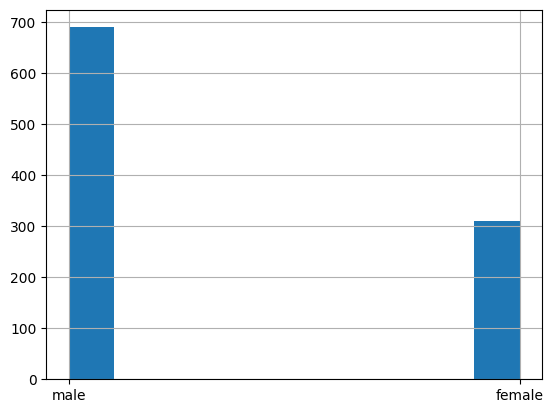

In [11]:
df.Sex.hist()

In [12]:
df_female = df[df["Sex"] == "female"]
df_female["Credit amount"].mean()

2877.7741935483873

In [13]:
df_female["Duration"].mean()

19.438709677419354

In [14]:
df_male = df[df["Sex"] == "male"]
df_male["Credit amount"].mean()

3448.040579710145

In [15]:
df_male["Duration"].mean()

21.56086956521739

Как видно из гистограммы выше, банк больше доверяет мужчинам при выдаче кредитов. Причина в том, что мужчины получили 700 кредитов, а женщины – 300. В среднем женщины получили кредиты на среднюю сумму 2877 долларов США и на короткие сроки.
С другой стороны, мужчины обычно занимали в среднем 3448 долларов и брали долгосрочные кредиты. Это говорит о том, что мужчины зарабатывают больше денег или имеют больше сбережений.

In [16]:
df.Job.value_counts()

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

<Axes: >

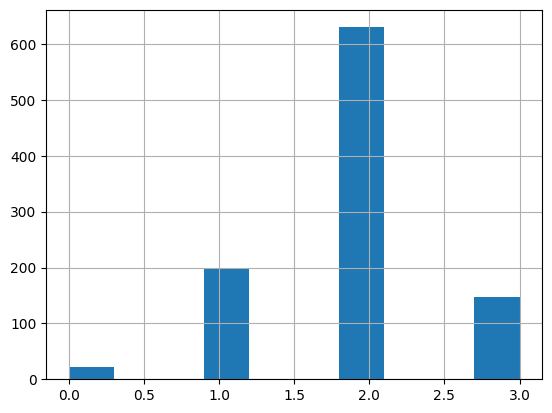

In [17]:
df.Job.hist()

In [18]:
df_Job_0 = df[df["Job"] == 0]
df_Job_0["Credit amount"].mean()

2745.1363636363635

In [19]:
df_Job_0["Duration"].mean()

17.363636363636363

In [20]:
df_Job_0["Age"].mean()

40.09090909090909

In [21]:
df_Job_0.shape

(22, 10)

In [22]:
df_Job_1 = df[df["Job"] == 1]
df_Job_1["Credit amount"].mean()

2358.52

In [23]:
df_Job_1["Duration"].mean()

16.535

In [24]:
df_Job_1["Age"].mean()

36.54

In [25]:
df_Job_1.shape

(200, 10)

In [26]:
df_Job_2 = df[df["Job"] == 2]
df_Job_2["Credit amount"].mean()

3070.9650793650794

In [27]:
df_Job_2["Duration"].mean()

21.41111111111111

In [28]:
df_Job_2["Age"].mean()

34.25396825396825

In [29]:
df_Job_2.shape

(630, 10)

Как видно из гистограммы выше, существует 4 различных типа должностей. Банк вообще не доверяет работе типа 0 и берет долгосрочный кредит. Средний возраст – 40 лет. Это должны быть пенсионеры. Всего получено 10 кредитов на среднюю сумму 2745 долларов США. Работающие клиенты банков первого типа получили в среднем 2 358 долларов США в виде кредитов. Средний срок кредита на один месяц меньше, чем у типа 0 (16). Что касается возраста, то средний возраст до выхода на пенсию составляет 36 лет. Люди этого возраста обычно достигли пенсионного возраста. В нашем случае 200 кредитов составляют 20% от общей суммы кредита. Клиенты второго типа составляют основной тип. в среднем они получают кредит в размере 3070 долларов США. Срок кредита достаточно длительный (21 месяц). а средний возраст составляет 34 года. Всего получено 630 кредитов (63%).

In [30]:
df.Housing.value_counts()

Housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [31]:
df["Saving accounts"].value_counts()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [32]:
df["Checking account"].value_counts()

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64

В столбцах сберегательных и текущих счетов пропущены значения. Эти данные можно заменить наиболее повторяющимися с учетом типа укуса.

In [33]:
df["Saving accounts"] = df["Saving accounts"].fillna("little")
df["Checking account"] = df["Checking account"].fillna("little")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   1000 non-null   object
 5   Checking account  1000 non-null   object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


Теперь проверим баланс данных. Мы делаем эту проверку в столбце «Риск». Как видно в нижнем ряду, баланса нет, т.е. 30% на 70%. Здесь мы думаем о том, как сбалансировать данные. Мы обучим эту модель и заменим ее на ту, которая показывает лучший результат. В нашем случае мы используем метод повышения дискретизации, поскольку данных мало.

In [34]:
df.Risk.value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

# Задание 2

Разделите датасет на обучающую и тестовую выборки в пропорции 80:20. Разделение должно быть стратифицированным по таргету Risk.

В этом и следующих заданиях используйте random_state = 1.

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [36]:
df_train, df_test = train_test_split(df, stratify=df["Risk"], random_state=1, test_size = 0.1)

In [37]:
df_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
254,24,male,2,own,little,moderate,2030,9,furniture/equipment,good
930,24,male,1,own,little,little,1747,24,furniture/equipment,good
280,23,male,2,rent,rich,little,3368,15,car,good
847,28,male,2,own,little,little,1249,24,car,good
561,24,male,1,rent,little,little,1546,24,radio/TV,bad
...,...,...,...,...,...,...,...,...,...,...
59,23,female,1,rent,little,little,6229,36,furniture/equipment,bad
350,23,female,2,rent,little,little,1236,9,domestic appliances,good
227,53,male,3,free,little,little,7865,12,furniture/equipment,bad
205,38,male,3,free,little,little,10623,30,car,good


# Задание 3

Проведите этап очистки и подготовки данных (data preparation) и подготовьте данные к моделированию.

In [38]:
df_train = pd.get_dummies(df_train, columns=['Housing','Saving accounts', 'Checking account', 'Purpose', 'Sex'], dtype='int')
df_test = pd.get_dummies(df_test, columns=['Housing','Saving accounts', 'Checking account', 'Purpose', 'Sex'], dtype='int')
df_train

,Age,Job,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_female,Sex_male
254,24,2,2030,9,good,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
930,24,1,1747,24,good,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
280,23,2,3368,15,good,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
847,28,2,1249,24,good,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
561,24,1,1546,24,bad,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,23,1,6229,36,bad,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
350,23,2,1236,9,good,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
227,53,3,7865,12,bad,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
205,38,3,10623,30,good,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
df_train["Risk"] = df_train["Risk"].apply(lambda x: 1 if x == "good" else 0)
df_test["Risk"] = df_test["Risk"].apply(lambda x: 1 if x == "good" else 0)
df_train

,Age,Job,Credit amount,Duration,Risk,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_female,Sex_male
254,24,2,2030,9,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
930,24,1,1747,24,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
280,23,2,3368,15,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
847,28,2,1249,24,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
561,24,1,1546,24,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,23,1,6229,36,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,0
350,23,2,1236,9,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
227,53,3,7865,12,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
205,38,3,10623,30,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


Kategorial ustun ma'lumotlarini columns=['Housing','Saving accounts', 'Checking account', 'Purpose', 'Sex'] numeric ko'rinishga o'tkazamiz. va Rist ustunini bad = 0 va good = 1 ga almashtiramiz.

# Задание 4

Сбалансируйте обучающую выборку методом SMOTE и обучите модель RandomForestClassifier. Подберите оптимальные гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [40]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
os = SMOTE(random_state=1)
y = df_train["Risk"]
X = df_train.drop(columns=["Risk"], axis= 1)
#X[scaler.get_feature_names_out()] = scaler.fit_transform(X)
X

,Age,Job,Credit amount,Duration,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Sex_female,Sex_male
254,24,2,2030,9,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
930,24,1,1747,24,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
280,23,2,3368,15,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
847,28,2,1249,24,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
561,24,1,1546,24,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,23,1,6229,36,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
350,23,2,1236,9,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
227,53,3,7865,12,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
205,38,3,10623,30,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [41]:
X_train, y_train = os.fit_resample(X, y)
y_train.value_counts()

Risk
1    630
0    630
Name: count, dtype: int64

In [42]:
y_t = df_test["Risk"]
X_t = df_test.drop(columns=["Risk"], axis= 1)
#X_t[scaler.get_feature_names_out()] = scaler.fit_transform(X_t)
X_test, y_test = os.fit_resample(X_t, y_t)
y_test.value_counts()

Risk
0    70
1    70
Name: count, dtype: int64

In [43]:
# Настройка параметров для GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [44]:
# Создаем модель и проводим подбор параметров
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Наилучшие параметры
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


# Задание 5

Обучите модель RandomForestClassifier с использованием весов классов. Подберите оптимальные веса и гиперпараметры с помощью GridSearch. Посчитайте метрику ROC-AUC на тестовой выборке.

In [45]:
X_test = df_test.drop(columns = ["Risk"])
y_test = df_test["Risk"]
# Обучаем модель с лучшими параметрами
best_rfc = grid_search.best_estimator_
y_pred_proba = best_rfc.predict_proba(X_train)[:, 1]

In [46]:
# Вычисление ROC-AUC на тестовой выборке
roc_auc = roc_auc_score(y_train, y_pred_proba)
print("ROC-AUC Score on test set: ", roc_auc)

ROC-AUC Score on test set:  0.9987755102040816


Наша модель работает очень хорошо в наборе данных поезда, но 0,66 в тестовом наборе данных. поэтому мы заново настраиваем параметры.

In [47]:
y_pred_proba = best_rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score on test set: ", roc_auc)

ROC-AUC Score on test set:  0.6619047619047619


In [48]:
rfc = RandomForestClassifier(max_depth = 20, min_samples_leaf =3, min_samples_split = 3, n_estimators = 55, max_features = 'log2', random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=3,
                       min_samples_split=3, n_estimators=55, random_state=42)

In [49]:
y_pred_test = rfc.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_test)
print("ROC-AUC Score on test set: ", roc_auc)

ROC-AUC Score on test set:  0.6847619047619048


In [50]:
y_pred_train = rfc.predict_proba(X_train)[:, 1]
roc_auc = roc_auc_score(y_train, y_pred_train)
print("ROC-AUC Score on test set: ", roc_auc)

ROC-AUC Score on test set:  0.97241370622323


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, rfc.predict(X_train))

array([[542,  88],
       [ 36, 594]])

In [52]:
confusion_matrix(y_test, rfc.predict(X_test))

array([[10, 20],
       [ 9, 61]])

Я изменил размер поезда с 0,9 на 0,1 и увеличил тест roc_ouc. Я также избегал переобучения, снижая гиперпараметры. StandardScaler показал очень плохой результат, поэтому оставил это в комментарии.